<a href="https://colab.research.google.com/github/karolinawegrzyn/effective_python/blob/master/lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [ ]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [ ]:
pd.read_csv('US_Baby_Names_right.csv')

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [ ]:
baby_names = pd.read_csv('US_Baby_Names_right.csv')
baby_names.info()
print(len(baby_names))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [ ]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'

In [ ]:
baby_names.drop(columns=['Unnamed: 0', 'Id'])

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [ ]:
unique_female_count = baby_names[baby_names['Gender'] == 'F']['Name'].unique()
unique_male_count = baby_names[baby_names['Gender'] == 'M']['Name'].unique()

print(f'Liczba imion kobiet: {len(unique_female_count)}')
print(f'Liczba imion mężczyzn: {len(unique_male_count)}')

if len(unique_female_count) > len(unique_male_count):
    print('więcej imion kobiet')
elif len(unique_female_count) < len(unique_male_count):
    print('więcej imion mężczyzn')
else:
    print('tyle samo imion kobiet i mężczyzn')

Liczba imion kobiet: 10929
Liczba imion mężczyzn: 8012
więcej imion kobiet


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [ ]:
baby_names.groupby('Name')['Name'].count().sort_values(ascending=False).head(10)

,Name
Name,
Riley,1112
Avery,1080
Jordan,1073
Peyton,1064
Hayden,1049
Taylor,1033
Jayden,1031
Alexis,984
Payton,971


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

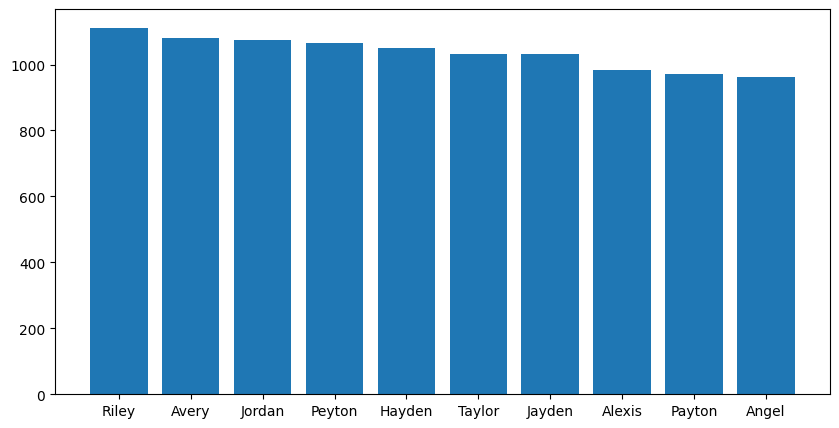

In [ ]:
names = baby_names.groupby('Name')['Name'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

<BarContainer object of 10 artists>

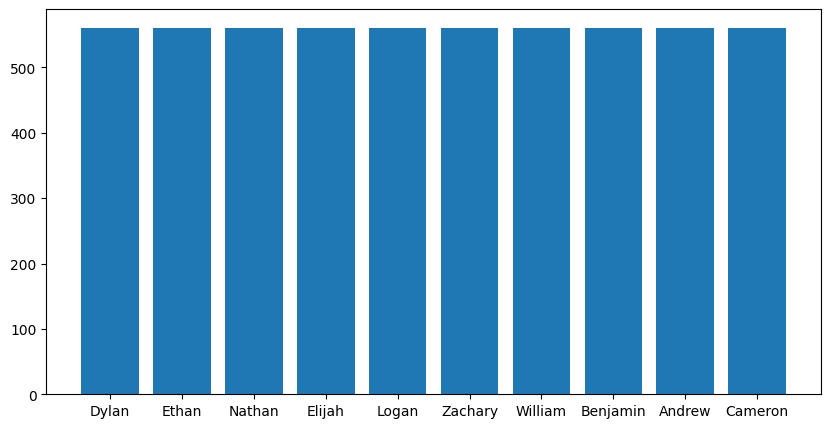

In [ ]:
males = baby_names[baby_names.Gender == "M"]
names = males.groupby('Name')['Name'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

<BarContainer object of 10 artists>

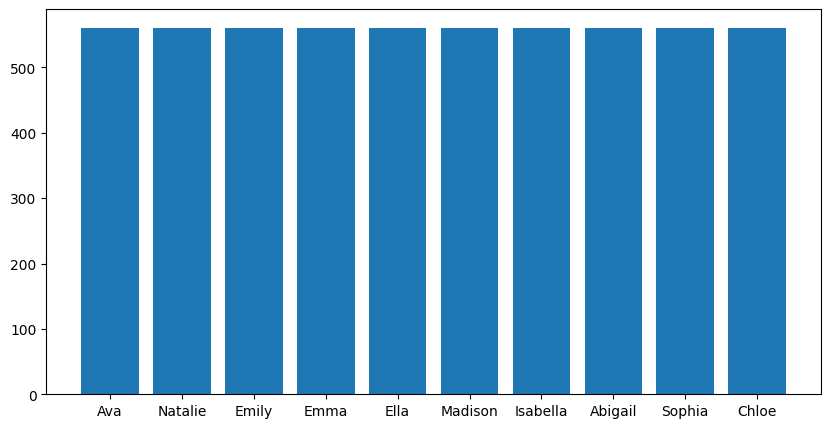

In [ ]:
females = baby_names[baby_names.Gender == "F"]
names = females.groupby('Name')['Name'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(names.index, names.values)

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [ ]:
print(len(baby_names['Name'].unique()))

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [ ]:
import numpy as np

In [ ]:
def generator():
  names = baby_names['Name'].unique()
  probs = baby_names.groupby('Name')['Name'].count() / len(baby_names)
  return np.random.choice(names, p=probs)

print(generator())

Emilyann


Krok 10:
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [ ]:
print("najczesciej wystepuje:", baby_names.groupby('Name')['Name'].count().sort_values(ascending=False).head(1).index[0])

print("srednia:", baby_names.groupby('Name')['Name'].count().mean())
print("mediana:", baby_names.groupby('Name')['Name'].count().median())
print("odchylenie standardowe:", baby_names.groupby('Name')['Name'].count().std())

najczesciej wystepuje: Riley
srednia: 57.644906987295826
mediana: 8.0
odchylenie standardowe: 122.02996350814125


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy:
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.